# PCA and ICA

**Summary**: This notebook illustrates how PCA and ICA performs multivariate decomposition and factorization to "unmix" signals into their respective components, We apply these methods onto data generated from a multivariate normal distribution with a fixed center and correlation matrix. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA

## I. Setting up PCA and ICA

Using a fixed random state allows us to generate the same points and find the same components every time.

In [2]:
state = 5 # makes rng repeatable
pca = PCA(n_components=2, random_state=state)
ica = FastICA(n_components=2, whiten="unit-variance", max_iter=1000, random_state=state)

## II. Applying PCA & ICA onto Gaussian Data Generated via Random Sampling

### Step 1: Generating Data and Applying PCA & ICA

Here, we simulate 1 sample of 100 data points. Then, we perform PCA and ICA before transforming the data according to the first and second components of each method.

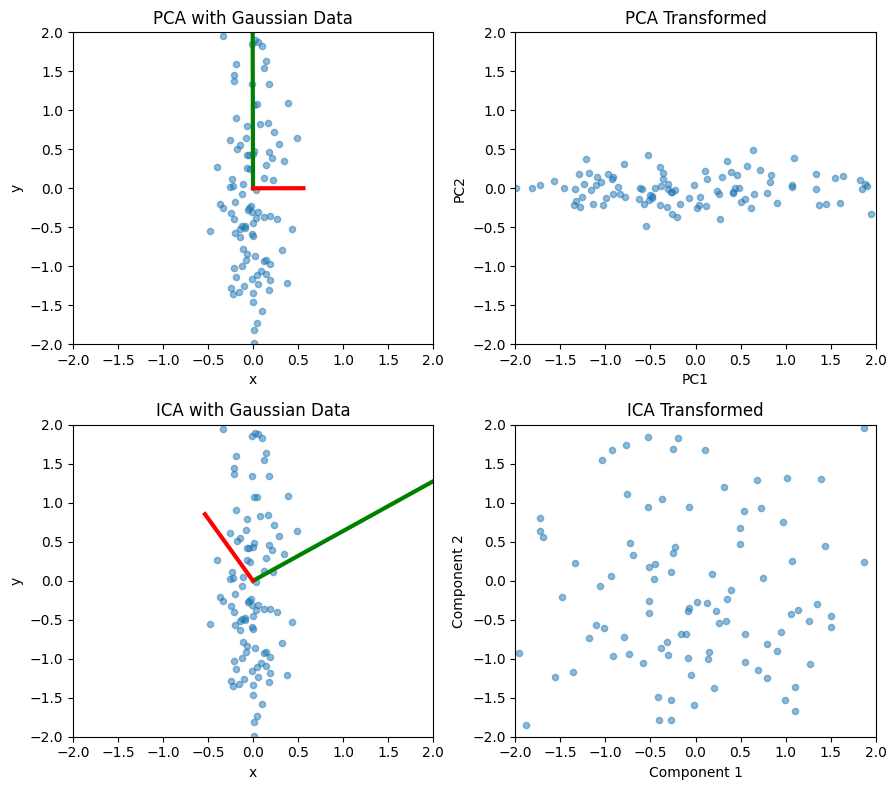

In [3]:
# Gaussian Data
mean = [0,0]
cov = [[1, 0],
       [0, 1]]
rng = np.random.default_rng(state)
X0 = rng.multivariate_normal(mean,cov,100)
X0[:, 0] = X0[:, 0] * 0.2

fig, axs = plt.subplots(2, 2, figsize=(9, 8))
axs[0,0].scatter(X0[:, 0], X0[:, 1], alpha=0.5, s=20)
axs[1,0].scatter(X0[:, 0], X0[:, 1], alpha=0.5, s=20)

# PCA
pca.fit(X0)
comp_1 = pca.components_.T[:, 0] * np.sqrt(pca.explained_variance_[0]) * 3
comp_2 = pca.components_.T[:, 1] * np.sqrt(pca.explained_variance_[1]) * 3
axs[0,0].plot([0, comp_1[0]], [0, comp_1[1]], lw=3, color='green')
axs[0,0].plot([0, comp_2[0]], [0, comp_2[1]], lw=3, color='red')
axs[0,0].set_title('PCA with Gaussian Data')
axs[0,0].set_xlim(-2, 2)
axs[0,0].set_ylim(-2, 2)
axs[0,0].set_xlabel('x')
axs[0,0].set_ylabel('y')

# PCA transformed
axs[0,1].scatter(X0@pca.components_[0], X0@pca.components_[1], alpha=0.5, s=20)
axs[0,1].set_title('PCA Transformed')
axs[0,1].set_xlim(-2, 2)
axs[0,1].set_ylim(-2, 2)
axs[0,1].set_xlabel('PC1')
axs[0,1].set_ylabel('PC2')

# ICA
ica.fit(X0)
comp_1 = ica.components_[:, 0]
comp_2 = ica.components_[:, 1]
axs[1,0].plot([0, comp_1[0]], [0, comp_1[1]], lw=3, color='green')
axs[1,0].plot([0, comp_2[0]], [0, comp_2[1]], lw=3, color='red')
axs[1,0].set_title('ICA with Gaussian Data')
axs[1,0].set_xlim(-2, 2)
axs[1,0].set_ylim(-2, 2)
axs[1,0].set_xlabel('x')
axs[1,0].set_ylabel('y')

# ICA transformed
axs[1,1].scatter(X0@ica.components_[0], X0@ica.components_[1], alpha=0.5, s=20)
axs[1,1].set_title('ICA Transformed')
axs[1,1].set_xlim(-2, 2)
axs[1,1].set_ylim(-2, 2)
axs[1,1].set_xlabel('Component 1')
axs[1,1].set_ylabel('Component 2')

plt.tight_layout()

### Step 2: Analyzing Results

From the charts above, we can see that PCA works well at finding the first and second principle components. The green line explains almost all of the variance and the red line explains the rest. When transformed, the result lies flat on the first principle component axis and is a useful visualization.

On the other hand, ICA does not work well on Gaussian data. The transformed result is not useful.

## III. Applying PCA & ICA onto Non-Gaussian Data Generated via Random Sampling

### Step 1: Generating Data and Applying PCA & ICA

Here, we simulate 1 sample of 50 data points. Then, we perform PCA and ICA before transforming the data according to the first and second components of each method.

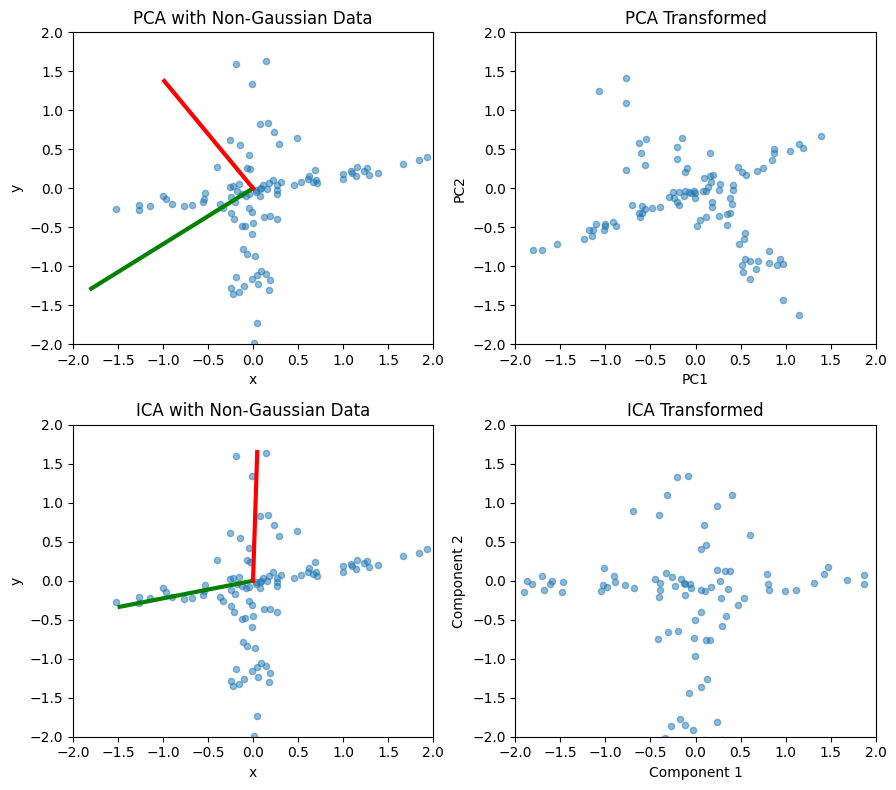

In [4]:
# Non Gaussian data

mean = [0,0]
cov = [[1, 0.95],
       [0.95, 1]]
rng = np.random.default_rng(state)
X0 = rng.multivariate_normal(mean,cov,50) # horizontal line, small slope
X0[:, 1] = X0[:, 1] * 0.2

mean = [0,0]
cov = [[1, 0],
       [0, 1]]
rng = np.random.default_rng(state)
X1 = rng.multivariate_normal(mean,cov,50) # vertical line
X1[:, 0] = X1[:, 0] * 0.2
X2 = np.concatenate([X0,X1]) # combined

fig, axs = plt.subplots(2, 2, figsize=(9, 8))
axs[0,0].scatter(X2[:, 0], X2[:, 1], alpha=0.5, s=20)
axs[1,0].scatter(X2[:, 0], X2[:, 1], alpha=0.5, s=20)

# PCA
pca.fit(X2)
comp_1 = pca.components_.T[:, 0] * np.sqrt(pca.explained_variance_[0]) * 3
comp_2 = pca.components_.T[:, 1] * np.sqrt(pca.explained_variance_[1]) * 3
axs[0,0].plot([0, comp_1[0]], [0, comp_1[1]], lw=3, color='green')
axs[0,0].plot([0, comp_2[0]], [0, comp_2[1]], lw=3, color='red')
axs[0,0].set_title('PCA with Non-Gaussian Data')
axs[0,0].set_xlim(-2, 2)
axs[0,0].set_ylim(-2, 2)
axs[0,0].set_xlabel('x')
axs[0,0].set_ylabel('y')

# PCA transformed
axs[0,1].scatter(X2@pca.components_[0], X2@pca.components_[1], alpha=0.5, s=20)
axs[0,1].set_title('PCA Transformed')
axs[0,1].set_xlim(-2, 2)
axs[0,1].set_ylim(-2, 2)
axs[0,1].set_xlabel('PC1')
axs[0,1].set_ylabel('PC2')

# ICA
ica.fit(X2)
comp_1 = ica.components_[:, 0]
comp_2 = ica.components_[:, 1]
axs[1,0].plot([0, comp_1[0]], [0, comp_1[1]], lw=3, color='green')
axs[1,0].plot([0, comp_2[0]], [0, comp_2[1]], lw=3, color='red')
axs[1,0].set_title('ICA with Non-Gaussian Data')
axs[1,0].set_xlim(-2, 2)
axs[1,0].set_ylim(-2, 2)
axs[1,0].set_xlabel('x')
axs[1,0].set_ylabel('y')

# ICA transformed
axs[1,1].scatter(X2@ica.components_[0], X2@ica.components_[1], alpha=0.5, s=20)
axs[1,1].set_title('ICA Transformed')
axs[1,1].set_xlim(-2, 2)
axs[1,1].set_ylim(-2, 2)
axs[1,1].set_xlabel('Component 1')
axs[1,1].set_ylabel('Component 2')

plt.tight_layout()

### Step 2: Analyzing Results

PCA does not work well this time and struggles to find the first and second principle components. When transformed, the result is still rotated and is not useful as a visualization of the explained variance.

However, ICA works very well with non-Gaussian data and is able to find the first two components. The transformed result aligns well with the component axes, and is useful in visualizing the variance explained by the two components.

## IV. Results

In the context of finding connected components or networks we need to apply the knowledge of ICA and PCA to carefully construct an atlas that will correctly implement correlations in networks. Successfully applying this will uncover the intricate networks of the brain.